# TP à rendre 1 quantification et échantillonage
Dans ce TP, nous aimerions transformer une image pseudo analogique en image numérique. 
L'image à coordonnées (x,y) réelles et valeurs d'amplitude f(x,y) réelles, devra être numérisée en:
- transformant d'abord les coordonnées en entiers 
- transformant ensuite les amplitudes en entiers

L'image pseudo analogique est contenue dans le fichier de données à loader.

# Nom et Prénom
- Segueni Seif Eddine
- Touabti Mohamed

# Importantion des librairies necessaires au travail

In [389]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Lecture des fichiers d'amplitude et coordonnées

In [390]:
outfile1 = 'lines1.npy'
outfile2 = 'Cols1.npy'
outfile3 = 'amplitude1.npy'
lines=np.load(outfile1)
cols=np.load(outfile2)
amplitude=np.load(outfile3)

# Functions

In [391]:
''' Cette fonction réalise l'échantillonnage,elle prend en paramètre, la dimension de la nouvelle matrice et le pas d'échantillonnage.
    il crée d'abord la matrice avec les nouvelles dimensions qui sont essentiellement la dimension des lignes et des cols divisée par le pas.
    puis elle parcours les vecteurs avec le pas, prends les données,
    multiplie-les par 1000 pour les transformer en entiers et pour obtenir la position à partir de l'amplitude de la matrice 
    et obtenir cette valeur après l'avoir transformée en un entier et la remplir dans la nouvelle matrice et ainsi de suite.
    à la fin nous aurons notre matrice avec la bonne dimension et remplie d'échantillons
'''
def sampling(w,h,step):
    matrix = np.ones((h,w))
    t = 0
    for i in range(0,1000,step):
        z = 0
        for j in range(0,1000,step):
            x = int(lines[i]*1000)
            y = int(cols[j]*1000)
            matrix[t][z]=int(amplitude[x][y]*1000)
            z+=1
        t+=1
    return matrix

''' Cette fonction crée la valeur de plage de nos échantillons afin que nous puissions les modifier plus tard, elle prend en paramètre le max et le min de nos échantillons.
    elle compte d'abord le décalage de chaque plage.
    puis elle crée une liste de ce type : [[a,b,c]] , le 'a' représente le début de la plage,'b' la fin,'c' le code équivalent
    et faites-le plusieurs fois jusqu'à ce que nous ayons toutes les valeurs possibles dans notre plage
    à la fin, il renvoie une liste de liste de nos valeurs de plage
'''
def createRange(min,max):
    offset = int(max / L)
    val_range = [[0,offset,0]]
    for i in range(2,L):
        val = [(i-1)*offset+1,i*offset,i-1]
        val_range.append(val)
    val = [(i)*offset+1,max,L-1]
    val_range.append(val)
    # for k in val_range:
    #     temp = format(k[2],"b")
    #     while len(temp) < 4 :
    #         temp = '0' + temp
    #     k[2] = temp
    return val_range

'''
    Cette fonction recherche la valeur passée dans le paramètre de notre matrice d'échantillons dans notre plage de valeurs 
    et identifie la partie qui appartient et lui donne le code équivalent.
'''
def codify(c,val_range):
    val = -1
    for i in range(len(val_range)) :
        if c >= val_range[i][0] and c <= val_range[i][1] :
            k = val_range[i]
            val = k[2]
            break
    return val 

# Echantillonage

In [392]:
# utiliser un saut pour l'échantillonage
step=5
# réaliser l'échantillonage
w = int(len(cols)/step)
h = int(len(lines)/step)
resultat = sampling(w,h,step)
print(resultat)

[[1000. 1000. 1000. ... 1000. 1000. 1000.]
 [1000. 1000. 1000. ... 1000. 1000. 1000.]
 [1000. 1000. 1000. ... 1000. 1000. 1000.]
 ...
 [1000. 1000. 1000. ... 1000. 1000. 1000.]
 [1000. 1000. 1000. ... 1000. 1000. 1000.]
 [1000. 1000. 1000. ... 1000. 1000. 1000.]]


# Quantification

In [393]:
nBits=4
# calculer le nombre de niveaux de gris
L= pow(2,nBits)
#réaliser la quantification
min = resultat.min()
max = resultat.max()
val_range = createRange(min,max)
print(val_range)

for i in range(h):
    for j in range(w):
        c = codify(resultat[i][j],val_range)
        resultat[i][j] = c

[[0, 62, 0], [63, 124, 1], [125, 186, 2], [187, 248, 3], [249, 310, 4], [311, 372, 5], [373, 434, 6], [435, 496, 7], [497, 558, 8], [559, 620, 9], [621, 682, 10], [683, 744, 11], [745, 806, 12], [807, 868, 13], [869, 930, 14], [931, 1000.0, 15]]


# Afficher l'image résultante

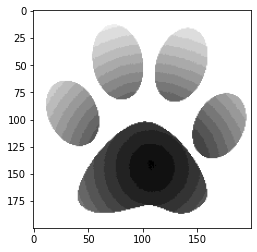

In [394]:
plt.imshow(resultat,cmap='gray')

# Sauvegarder l'image résultante

In [395]:
plt.imsave("resultat.png", resultat, cmap='gray')

# Lecture et affichage d'une autre image 


In [396]:
# lecture de l'image en niveau de gris
image = cv2.imread('toAdd.bmp',0)
image2 = cv2.imread('resultat.png',0)

In [397]:
# afficher avec opencv
# cv2.namedWindow('image', cv2.WINDOW_NORMAL)
# cv2.imshow('image',image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

# Réaliser les operations sur l'image

Addition des deux images

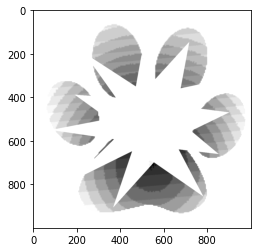

In [398]:
# additionner image et resultat
height, width = image.shape
newDim = (height,width)
image2 = cv2.resize(image2,newDim,interpolation = cv2.INTER_LINEAR)
imageA = cv2.add(image2,image)
plt.imshow(imageA,cmap='gray')
# cv2.namedWindow('image', cv2.WINDOW_NORMAL)
# cv2.imshow('image',imageA)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
# si les deux images ne sont pas de même taille, 
# il faudra les redimensionner
# analyser les paramètres de redimensionnement

# Negatif de l'image

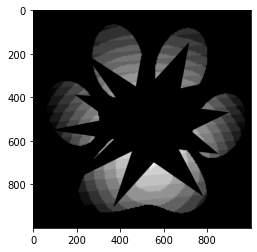

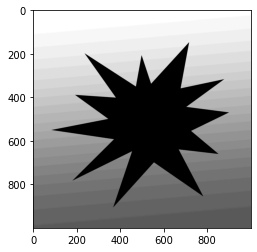

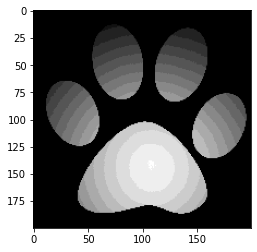

In [399]:
newDim = (w,h)
image2 = cv2.resize(image2,newDim,interpolation = cv2.INTER_LINEAR)
# soustraire de 255 de chaque pixel 
imageN = cv2.bitwise_not(imageA)
# afficher l'image résultante
plot1 = plt.figure(1)
plt.imshow(imageN,cmap='gray')

plot2 = plt.figure(2)
imageN = cv2.bitwise_not(image)
plt.imshow(imageN,cmap='gray')

plot3 = plt.figure(3)
imageN = cv2.bitwise_not(image2)
plt.imshow(imageN,cmap='gray')

# Consignes

Le travail est à remettre par groupe de 4 au maximum [1..4].

Le délai est le vendredi à 19h

In [400]:
# bonne chance

# Rapport
Afin de transformer une image analogique en une image numérique, nous avons implémenté cet algorithme pour le faire.cet algorithme prend en entrée les données brutes de l'image analogique, puis avec échantillonnage et quantification et codification il retourne et affiche l'image numérique.
pour réaliser l'échantillonnage, nous avons implémenté une fonction qui renvoie une matrice remplie des échantillons à l'aide d'un pas donné.
puis pour la quantification, on définit notre nombre de bits par pixel, puis on va chercher la valeur max et la valeur min afin de déterminer notre plage de valeurs à l'aide de la fonction de quatification qui renvoie notre plage de valeurs.
à la fin nous parcourons notre matrice d'échantillons et pour chaque élément nous le codifierons à l'aide d'une fonction qui déterminera à quelle plage il appartient et renverra le code équivallant, puis nous le remplacerons dans notre matrice finale.
Et comme ça, nous avons notre image comme montrée et enregistrée.
La deuxième partie de ce travail est dédiée à l'application d'opérations sur des images à l'aide des bibliothèques openCV.
Nous ouvrons d'abord les deux images avec le niveau de gris qui est traité en utilisant l'argument 0,Alors maintenant, nous avons notre image dans une matrice de valeurs de niveaux de gris.
Ensuite, pour ajouter ou soustraire deux images, elles doivent avoir la même taille, dans notre cas, elles sont différentes, nous avons donc utilisé la fonction de redimensionnement pour redimensionner la plus petite image à la grande dimension de l'image que nous avons obtenue en utilisant la propriété de forme,en suite on applique cette operation avec la fonction resize(),qui prend en paramètres l'image à redimensionner et la nouvelle dimension et le type de redimensionnement.
Après avoir redimensionné nos images, nous utilisons l'image d'ajout pour ajouter les deux images dans la nouvelle image et l'afficher.
Pour l'inversion d'image, il existe deux méthodes. Soit nous soustrayons 255 de chaque pixel de l'image, soit nous appliquons simplement le not au niveau du bit pour chaque pixel en utilisant le cv2.bitwise_not() et c'est ce que nous avons utilisé pour toutes les images comme indiqué.
